# Vision Application via Google Cloud Vision API

## 初始化 

In [5]:
import os

from google.cloud import vision

YOUR_SERVICE = 'YOUR_SERVICE'
YOUR_PIC = 'YOUR_PIC'

os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = YOUR_SERVICE
client = vision.ImageAnnotatorClient()

ContextualVersionConflict: ignored

## 準備圖檔

In [ ]:
# through GCS

from google.cloud import storage

YOUR_BUCKET = 'YOUR_BUCKET'
YOUR_PIC = 'YOUR_PIC'

storage_client = storage.Client()
bucket = storage_client.bucket(YOUR_BUCKET)
bucket.blob(YOUR_PIC).upload_from_filename(YOUR_PIC)
image_uri = f'gs://{YOUR_BUCKET}/{YOUR_PIC}'
source = vision.ImageSource(image_uri=image_uri)
image = vision.Image(source=source)
#image = vision.Image()
#image.source.image_uri = image_uri

In [ ]:
# one-shot upload

YOUR_PIC = '/hahah.png'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

## label_detection

In [ ]:
response = client.label_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('/hahah.png')
plt.imshow(im)
plt.show()

for label in response.label_annotations:
    print(f'{label.description}, {label.score:.3f}')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## face_detection

In [ ]:
response = client.face_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('/hahah.png')

plt.imshow(im)

for face in response.face_annotations:
    vs = [{'v': face.bounding_poly.vertices, 'c': 'red'},
          {'v': face.fd_bounding_poly.vertices, 'c': 'blue'}]
    for vd in vs:
        a = [(v.x, v.y) for v in vd['v']]
        a.append(a[0])
        x, y = zip(*a)
        plt.plot(x, y, color=vd['c'])

plt.show()

for face in response.face_annotations:
    print(f'joy: {face.joy_likelihood.name}')
    print(f'sorrow: {face.sorrow_likelihood.name}')
    print(f'anger: {face.anger_likelihood.name}')
    print(f'surprise: {face.surprise_likelihood.name}')
    print(f'under_exposed: {face.under_exposed_likelihood.name}')
    print(f'blurred: {face.blurred_likelihood.name}')
    print(f'headwear: {face.headwear_likelihood.name}')

## text_detection

In [ ]:
response = client.text_detection(image=image)

NameError: ignored

NameError: ignored

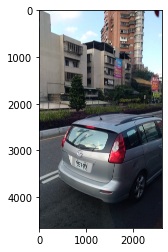

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('/some_plate.jpg')

plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')

plt.show()

## document_text_detection

In [ ]:
response = client.document_text_detection(image=image)

NameError: ignored

NameError: ignored

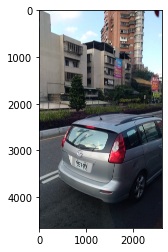

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open('/some_plate.jpg')

plt.imshow(im)

for text in response.text_annotations:
    print(text.description)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')

plt.show()

## object_localization

In [ ]:
response = client.object_localization(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

w, h = im.size
for obj in response.localized_object_annotations:
    desc = f'{obj.name}: {obj.score:.2f}'
    a = [(v.x * w, v.y * h) for v in obj.bounding_poly.normalized_vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], desc, color='yellow')

plt.show()

## web_detection

In [ ]:
response = client.web_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)
plt.imshow(im)
plt.show()

for x in response.web_detection.web_entities:
    print(x.description)
for x in response.web_detection.visually_similar_images :
    print(x.url)
for x in response.web_detection.best_guess_labels:
    print(x) 

## landmark_detection

In [ ]:
# one-shot upload

YOUR_PIC = 'YOUR_PIC'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.landmark_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for text in response.landmark_annotations:
    desc = f'{text.description} @ ' \
           f'({text.locations[0].lat_lng.latitude}, {text.locations[0].lat_lng.longitude})'
    print(desc)
    a = [(v.x, v.y) for v in text.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], desc, color='yellow')

plt.show()

## logo_detection

In [ ]:
# one-shot upload

YOUR_PIC = 'YOUR_PIC'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.logo_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)

plt.imshow(im)

for logo in response.logo_annotations :
    print(logo.description)
    a = [(v.x, v.y) for v in logo.bounding_poly.vertices]
    a.append(a[0])
    x, y = zip(*a)
    plt.plot(x, y, color='blue')
    plt.text(x[0], y[0], logo.description, color='yellow')

plt.show()

## safe_search_detection

In [ ]:
# one-shot upload

YOUR_PIC = 'YOUR_PIC'

with open(YOUR_PIC, 'rb') as image_file:
    content = image_file.read()
image = vision.Image(content=content)

In [ ]:
response = client.safe_search_detection(image=image)

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image

im = Image.open(YOUR_PIC)
plt.imshow(im)
plt.show()

print('adult:', response.safe_search_annotation.adult.name)
print('spoof:', response.safe_search_annotation.spoof.name)
print('medical:', response.safe_search_annotation.medical.name)
print('violence:', response.safe_search_annotation.violence.name)
print('racy:', response.safe_search_annotation.racy.name)